# Data visualization of the preprocessed cocktails dataframe
**Steps:**
1. Import libraries and the dataset
2. Heatmaps
3. Boxplots
4. Barplots

## Import necessary libraries and the cocktails preprocessed dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_parquet("../data/final_cocktail_dataset.parquet")
df.head(n=2).T

,0,1
id,11000,11001
name,Mojito,Old Fashioned
ordinaryDrink,0,0
glass_Champagne flute,0.0,0.0
glass_Cocktail glass,0.0,0.0
glass_Collins glass,0.0,0.0
glass_Highball glass,1.0,0.0
glass_Old-fashioned glass,0.0,1.0
glass_Other,0.0,0.0
glass_Whiskey sour glass,0.0,0.0


## Heatmaps to show corealtions between distinct columns
Since there are too many numeric columns, separate it into two heatmaps one consisting of the ingredients and the other one of the rest of the numeric columns,

In [6]:
numeric_without_ingredients_df = df.iloc[:, 2:13]
ingredietns_df = df.iloc[:, 13:34]

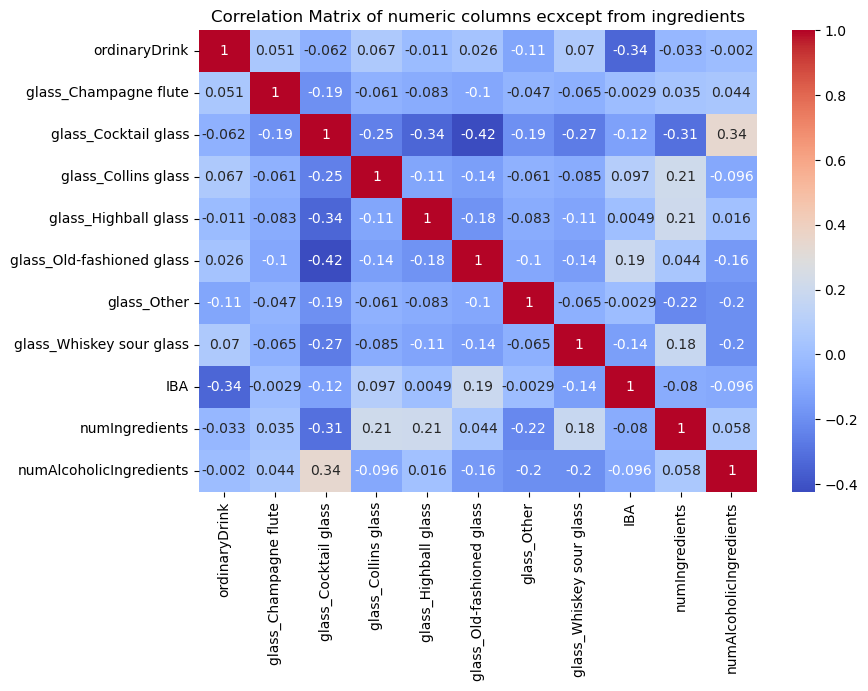

In [7]:
plt.figure(figsize=(9, 6))
sns.heatmap(numeric_without_ingredients_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of numeric columns ecxcept from ingredients")
plt.show()

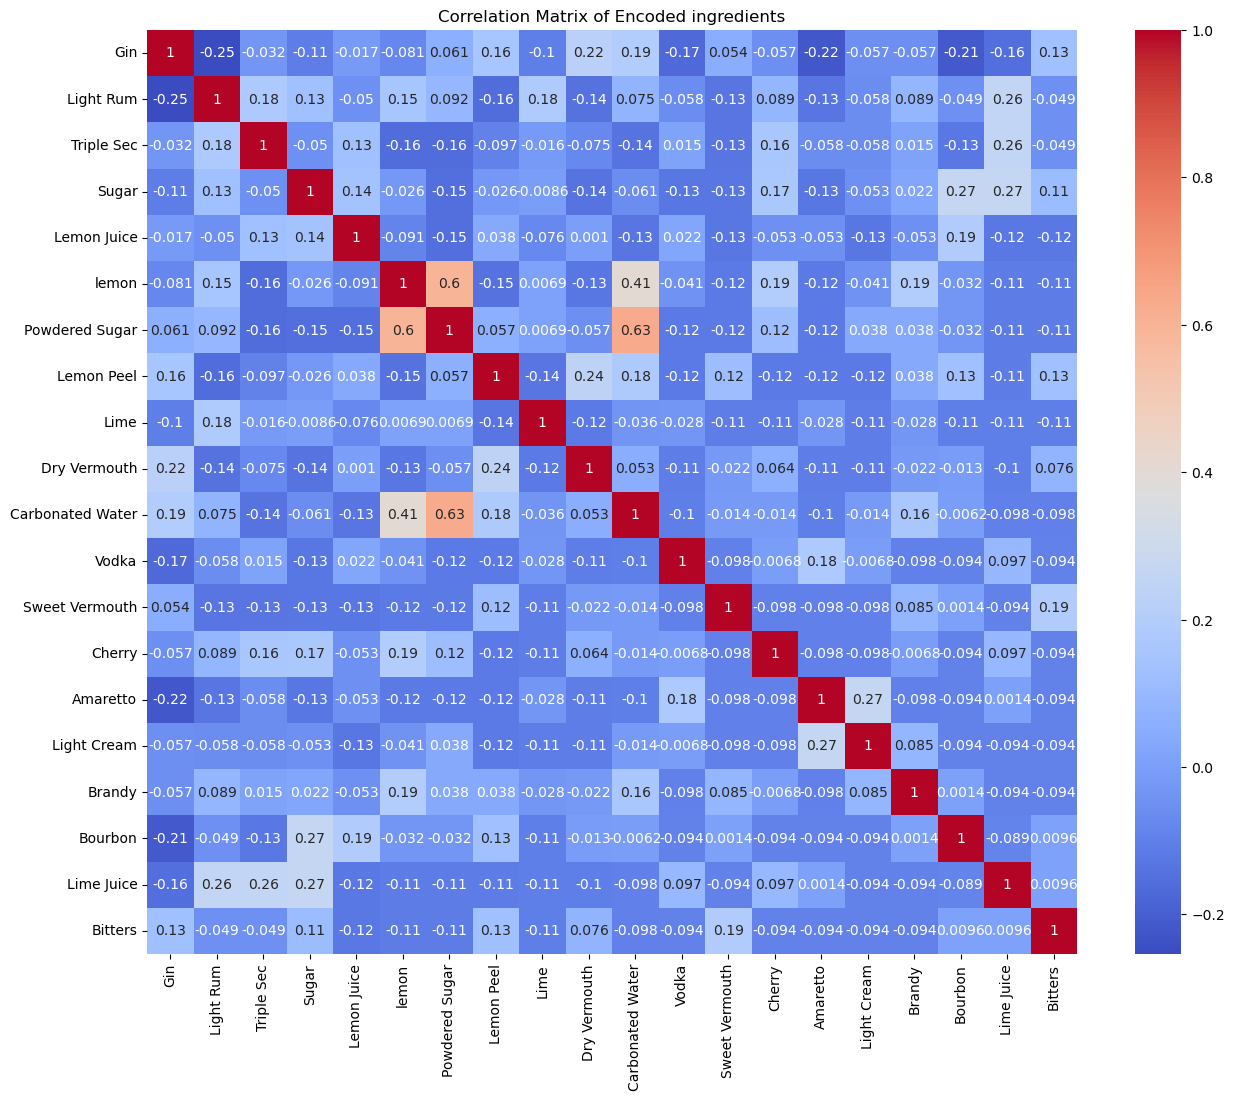

In [8]:
plt.figure(figsize=(15,12))
sns.heatmap(ingredietns_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Encoded ingredients")
plt.show()

#### Observations
- Generally correlations vary between -1 and 1, where -1 means that as one increases, the other decreases and 1 the other way around.
- There are no extremly high correlations between single columns.
- Maximum correlation is equal to 0.63.
- Maximum neqative correlaion is equal to -0.42.
- There are 8 correlations between pairs of columns that are over 0.40 or under -0.40.
- The biggest correlation between powderd sugar and carbonated water and lemon is logical and might indecate that these ingredients are often put together for balancing the tastes.

## Boxplots of numeric columns

<Axes: xlabel='numIngredients'>

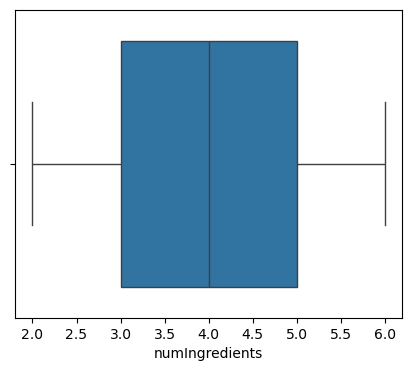

In [11]:
plt.figure(figsize=(5, 4))
sns.boxplot(x="numIngredients", data=df)

#### Observations
- every cocktail has between 2-6 ingredietns
- the distribution is symetrical and focused around the middle value
- there are no outliers.

<Axes: ylabel='numAlcoholicIngredients'>

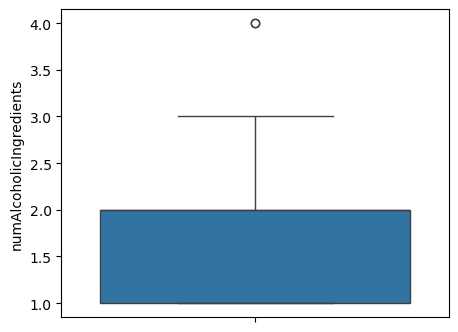

In [13]:
plt.figure(figsize=(5, 4))
sns.boxplot(y="numAlcoholicIngredients", data=df)

#### Observations
- 75% of cocktails have either 1 or 2 alcoholic ingredients
- maximum value is 3 but for rare cocktails there are 4 alcoholic ingredients

## Barplots

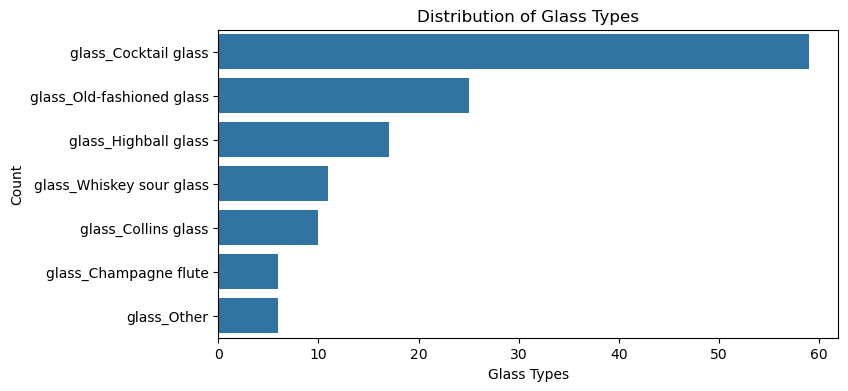

In [16]:
glass_columns = df.filter(like='glass').columns
glass_sums = df[glass_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=glass_sums.values, y=glass_sums.index)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Types')
plt.ylabel('Count')
plt.show()

CocktailsGlass is the most common glass type and it is used for over a half of all the cocktails

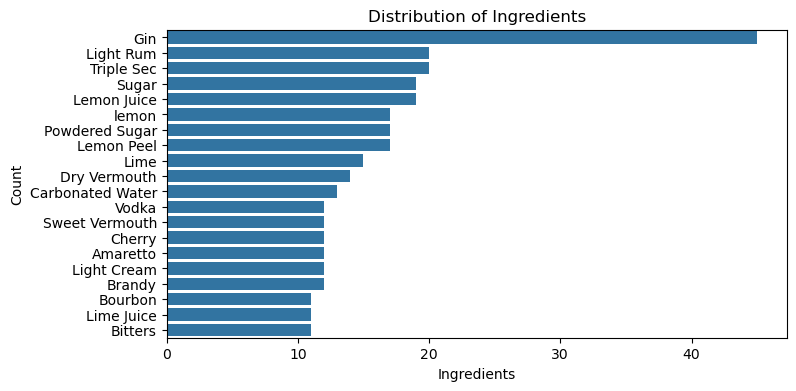

In [18]:
ingredients_columns = df.columns[-20:]
ingredients_sums = df[ingredients_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=ingredients_sums.values, y=ingredients_sums.index)
plt.title('Distribution of Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Count')

plt.show()

Gin is the most common ingredient and it appears in almost half of all the cocktails.